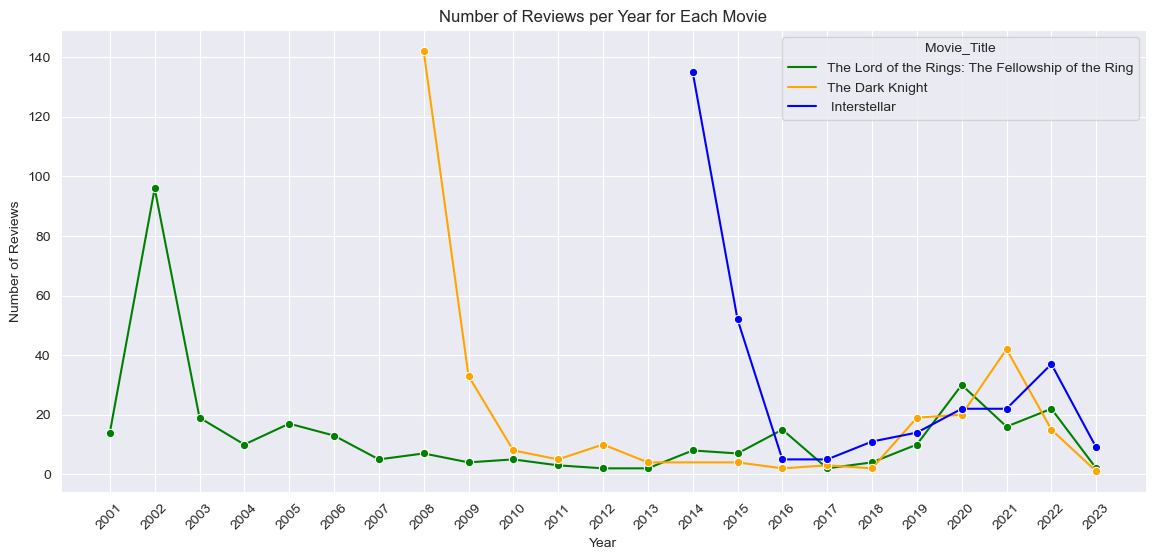

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
data = pd.read_excel('/users/IR/IMDBDATA1.xlsx')

# Parse the Review_Date field
data['Review_Date'] = pd.to_datetime(data['Review_Date'])

# Group the data by Movie_Title and year, and count the number of reviews for each group
data['Year'] = data['Review_Date'].dt.year
grouped_data = data.groupby(['Movie_Title', 'Year']).size().reset_index(name='Review_Count')

# Sort the data by 'Year'
grouped_data = grouped_data.sort_values(by=['Year'])

# Create a line plot using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))

# Define the custom color palette
custom_palette = {
    'The Dark Knight': 'orange',
    'The Lord of the Rings: The Fellowship of the Ring': 'green',
    ' Interstellar': 'blue'
}

ax = sns.lineplot(
    x='Year',
    y='Review_Count',
    hue='Movie_Title',
    data=grouped_data,
    palette=custom_palette,  # Use the custom color palette
    marker='o'
)

# Update layout
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews per Year for Each Movie')

# Set x-axis ticks in 1-year increments
min_year = grouped_data['Year'].min()
max_year = grouped_data['Year'].max()
ax.set_xticks(range(min_year, max_year + 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()
